<a href="https://colab.research.google.com/github/9LEWANDOWSKI9/2023-/blob/main/555.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 读取Excel文件
file_path = 'A.xlsx'  # 替换为你的Excel文件路径
df = pd.read_excel(file_path)

# 提取第一列元素为NumPy数组
array1 = np.array(df.iloc[1:,0])
array2 = np.array(df.iloc[1:,1])
array3 = np.array(df.iloc[1:,2])
longitude_max = max(array1)
latitude_max = max(array1)
gravity_anomaly_max = max(array3)
longitude_min = min(array1)
latitude_min = min(array1)
gravity_anomaly_min = min(array3)
print(len(array1))

14882


In [ ]:
import cv2
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def image_segmentation_fcm(image_path, n_clusters, m, max_iter=100, theta=1e-5, seed=0):
    # 读取图像
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # 将图像数据整理成一维数组
    data = image.reshape((-1, 3)).astype(float)

    # 归一化数据
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # 运行 FCM 聚类
    centers, U = FCM_train(data_scaled, n_clusters, m, max_iter=max_iter, theta=theta, seed=seed)

    # 获取聚类结果
    labels = FCM_getClass(U)
    labels = labels.reshape((height, width))

    return labels

# 示例用法
image_path = 'your_image_path.jpg'
n_clusters = 3
m = 2.0
segmentation_result = image_segmentation_fcm(image_path, n_clusters, m)

# 可视化聚类结果
plt.imshow(segmentation_result, cmap='viridis')
plt.title('FCM Image Segmentation Result')
plt.show()


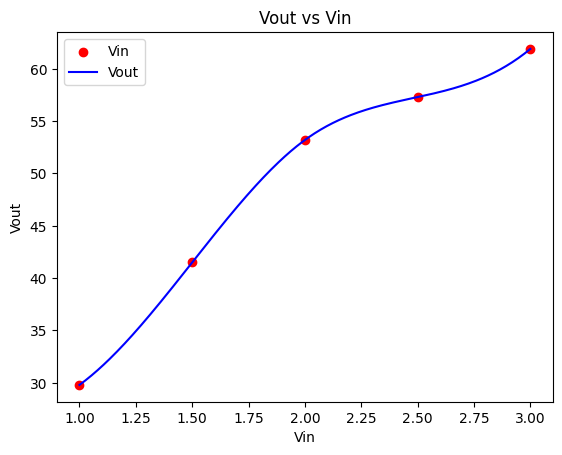

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

x_known = np.array([1, 1.5, 2, 2.5, 3])
y_known = np.array([29.8, 41.5, 53.2, 57.3, 61.9])

x_new = np.linspace(min(x_known), max(x_known), 300)
spl = make_interp_spline(x_known, y_known, k=3)
y_new = spl(x_new)
#plt.xlim(0, 3.2)
#plt.ylim(0.95, 2.1)
plt.scatter(x_known, y_known, label='Vin', color='red')
plt.plot(x_new, y_new, label='Vout', color='blue')
#plt.axhline(y=2, color='green', linestyle='--', label='SWR=2')
plt.xlabel('Vin')
plt.ylabel('Vout')
plt.title('Vout vs Vin')
plt.legend()
plt.show()

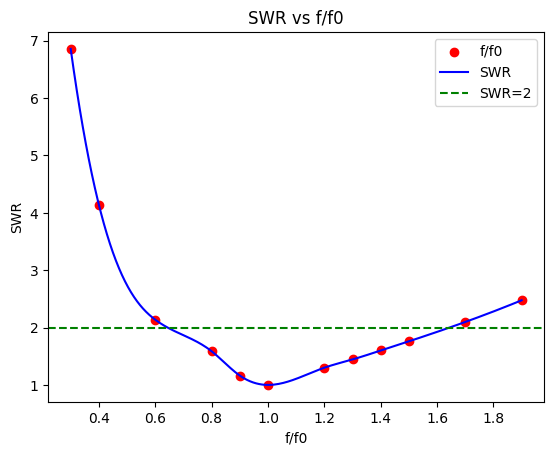

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

x_known = np.array([0.3,0.4,0.6,0.8,0.9,1.0,1.2,1.3,1.4,1.5,1.7,1.9])
y_known = np.array([6.856, 4.14,  2.1366,  1.587, 1.163,1,1.3,1.4439,1.6,1.76,2.097,2.475])

x_new = np.linspace(min(x_known), max(x_known), 300)
spl = make_interp_spline(x_known, y_known, k=3)
y_new = spl(x_new)
#plt.xlim(0, 3.2)
#plt.ylim(0.95, 2.1)
plt.scatter(x_known, y_known, label='f/f0', color='red')
plt.plot(x_new, y_new, label='SWR', color='blue')
plt.axhline(y=2, color='green', linestyle='--', label='SWR=2')
plt.xlabel('f/f0')
plt.ylabel('SWR')
plt.title('SWR vs f/f0')
plt.legend()
plt.show()

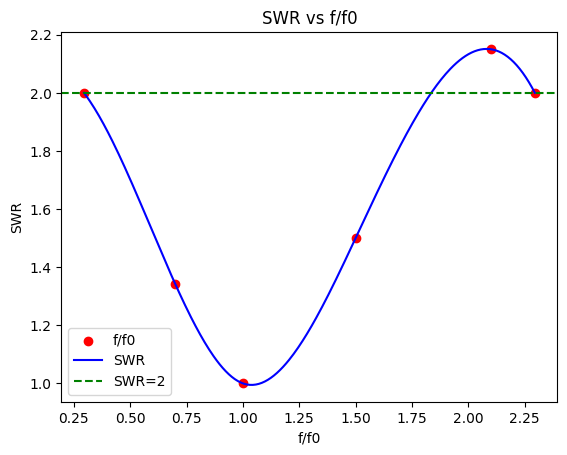

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

x_known = np.array([0.295, 0.7, 1, 1.5, 2.1, 2.295])
y_known = np.array([2, 1.342, 1, 1.5, 2.15, 2])

x_new = np.linspace(min(x_known), max(x_known), 300)
spl = make_interp_spline(x_known, y_known, k=3)
y_new = spl(x_new)

plt.scatter(x_known, y_known, label='f/f0', color='red')
plt.plot(x_new, y_new, label='SWR', color='blue')
plt.axhline(y=2, color='green', linestyle='--', label='SWR=2')
plt.xlabel('f/f0')
plt.ylabel('SWR')
plt.title('SWR vs f/f0')
plt.legend()
plt.show()


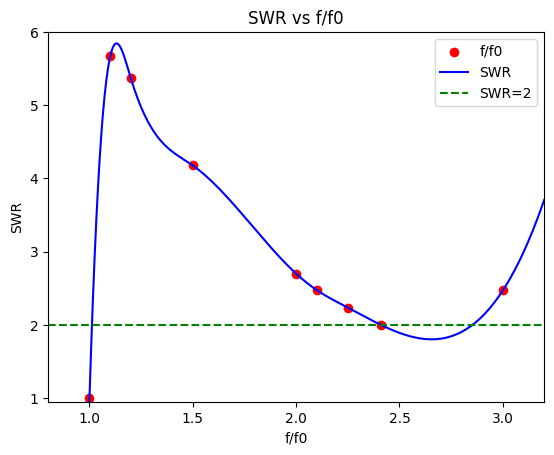

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

x_known = np.array([1, 1.1, 1.2, 1.5, 2, 2.1, 2.25, 2.41, 3])
y_known = np.array([1, 5.667, 5.37, 4.178, 2.7, 2.475, 2.236, 2, 2.47])

new_x_range = np.linspace(0.8, 3.2, 300)
new_y_range = np.linspace(0.95, 6, 300)

spline = UnivariateSpline(x_known, y_known, s=0)
y_smooth = spline(new_x_range)

plt.scatter(x_known, y_known, label='f/f0', color='red')
plt.plot(new_x_range, y_smooth, label='SWR', color='blue')
plt.axhline(y=2, color='green', linestyle='--', label='SWR=2')
plt.xlim(0.8, 3.2)
plt.ylim(0.95, 6)
plt.xlabel('f/f0')
plt.ylabel('SWR')
plt.title('SWR vs f/f0')
plt.legend()
plt.show()


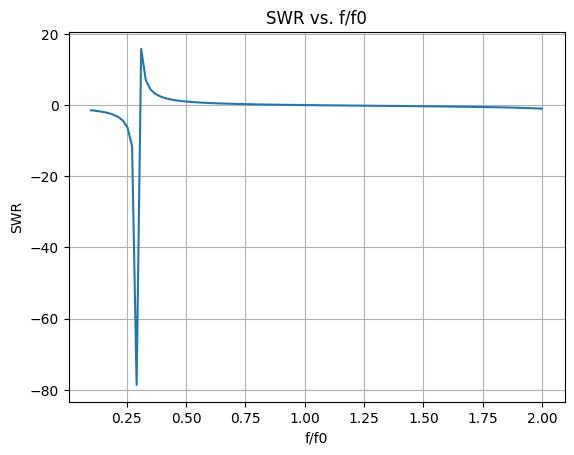

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_swr(f_over_f0):
    return ( 1 / np.tan(np.pi / 2 * f_over_f0)) / (2- 1 / np.tan(np.pi / 2 * f_over_f0) )

# 生成一系列 f/f0 的值
f_over_f0_values = np.linspace(0.1, 2.0, 100)

# 计算对应的 SWR 值
swr_values = [calculate_swr(f) for f in f_over_f0_values]

# 绘制图表
plt.plot(f_over_f0_values, swr_values)
plt.xlabel('f/f0')
plt.ylabel('SWR')
plt.title('SWR vs. f/f0')
plt.grid(True)
plt.show()


Skipping invalid data: ['5.804374999910e']
Column 1: [0.004439046874947, 0.004439062499947, 0.004439078124947, 0.004439093749947, 0.004439109374947]
Column 2: [-10.539, -10.377, -10.443, -10.726, -11.184]
Column 3: [-23.465, -23.313, -23.372, -23.632, -21.012]
Skipping invalid data: ['5.804374999910e']
Column 1: [0.004439046874947, 0.004439062499947, 0.004439078124947, 0.004439093749947, 0.004439109374947]
Column 2: [-10.539, -10.377, -10.443, -10.726, -11.184]
Column 3: [-23.465, -23.313, -23.372, -23.632, -21.012]


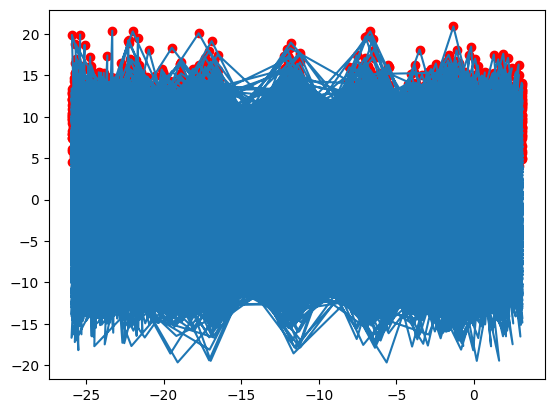

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def AMPD(data):
    """
    实现AMPD算法
    :param data: 1-D numpy.ndarray
    :return: 波峰所在索引值的列表
    """
    p_data = np.zeros_like(data, dtype=np.int32)
    count = data.shape[0]
    arr_rowsum = []
    for k in range(1, count // 2 + 1):
        row_sum = 0
        for i in range(k, count - k):
            if data[i] > data[i - k] and data[i] > data[i + k]:
                row_sum -= 1
        arr_rowsum.append(row_sum)
    min_index = np.argmin(arr_rowsum)
    max_window_length = min_index
    for k in range(1, max_window_length + 1):
        for i in range(k, count - k):
            if data[i] > data[i - k] and data[i] > data[i + k]:
                p_data[i] += 1
    return np.where(p_data == max_window_length)[0]

# 用于存储每一列数据的列表
column1 = []
column2 = []
column3 = []

# 打开文本文件
file_path = 'AM.txt'

with open(file_path, 'r') as file:
    # 逐行读取文件
    for line in file:
        # 假设数据以空格或制表符分隔
        data = line.split()

        # 确保列表包含足够的元素
        if len(data) >= 3:
            # 将数据分别存储到对应的列表中
            column1.append(float(data[0]))
            column2.append(float(data[1]))
            column3.append(float(data[2]))
        else:
            print(f"Skipping invalid data: {data}")

# 打印每一列的前几个元素
print("Column 1:", column1[:5])
print("Column 2:", column2[:5])
print("Column 3:", column3[:5])


def sim_data(x_values):
    # 确保 x_values 是有效的 NumPy 数组
    x_values = np.asarray(x_values, dtype=float)

    # 处理空数据行
    x_values = x_values[~np.isnan(x_values)]

    # 检查 x_values 是否包含足够的元素
    if len(x_values) == 0:
        raise ValueError("Invalid data: Empty or missing x_values")

    y = 2 * np.cos(2 * np.pi * 300 * x_values) \
        + 5 * np.sin(2 * np.pi * 100 * x_values) \
        + 4 * np.random.randn(len(x_values))
    return y


def vis():
    # 用于存储每一列数据的列表
    column1 = []
    column2 = []
    column3 = []

    # 打开文本文件
    file_path = 'AM.txt'

    with open(file_path, 'r') as file:
        # 逐行读取文件
        for line in file:
            # 假设数据以空格或制表符分隔
            data = line.split()

            # 确保列表包含足够的元素
            if len(data) >= 3:
                # 将数据分别存储到对应的列表中
                column1.append(float(data[0]))
                column2.append(float(data[1]))
                column3.append(float(data[2]))
            else:
                print(f"Skipping invalid data: {data}")

    # 打印每一列的前几个元素
    print("Column 1:", column1[:5])
    print("Column 2:", column2[:5])
    print("Column 3:", column3[:5])

    try:
        x_values = np.array(column3)  # 使用第三列数据作为 x
        y = sim_data(x_values)
        plt.plot(x_values, y)
        px = AMPD(y)
        plt.scatter(x_values[px], y[px], color="red")
        plt.show()
    except ValueError as e:
        print(f"Error: {e}")


vis()

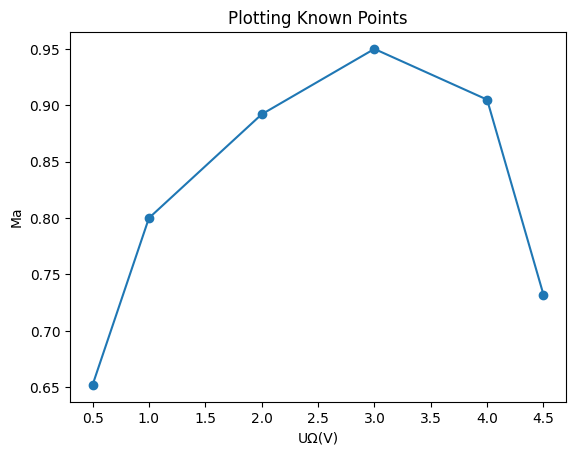

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# 已知点
x = np.array([0.5, 1, 2, 3, 4, 4.5])
y = np.array([0.652, 0.800, 0.892, 0.950, 0.905, 0.732])

# 绘制图像
plt.plot(x, y, marker='o', linestyle='-')

# 添加标题和标签
plt.title('Plotting Known Points')
plt.xlabel('UΩ(V)')
plt.ylabel('Ma')

# 显示图像
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 指定文件路径
file_path = '高AM.txt'

# 使用NumPy的loadtxt函数加载文本文件数据
data = np.loadtxt(file_path)

# 获取第一列和第三列的数据
column1 = data[:, 0]
column3 = data[:, 2]

# 绘制图像
plt.plot(column1, column3, label='Column 1 vs Column 3')

# 添加标签和标题
plt.xlabel('Column 1')
plt.ylabel('Column 3')
plt.title('Function Plot of Column 1 vs Column 3')

# 添加图例
plt.legend()

# 显示图形
plt.show()


FileNotFoundError: ignored

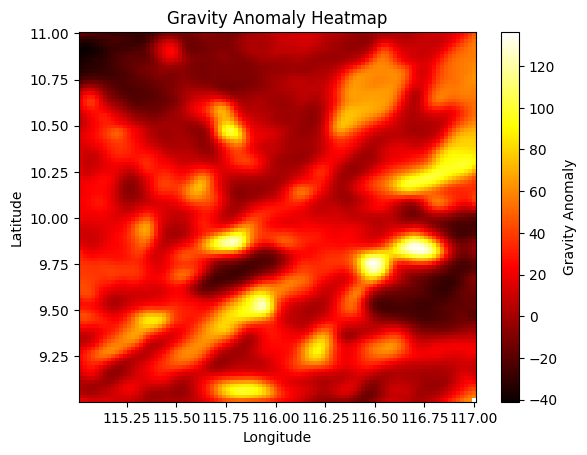

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# 假设你有经度、纬度和重力异常值的数组
longitude = np.array(df.iloc[1:,0])
latitude = np.array(df.iloc[1:,1])
gravity_anomaly = np.array(df.iloc[1:,2])

# 定义网格范围
lon_min, lon_max = np.min(longitude), np.max(longitude)
lat_min, lat_max = np.min(latitude), np.max(latitude)

# 创建网格
lon_values, lat_values = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))

# 对经纬度和重力异常值进行克里金插值
points = np.column_stack((longitude, latitude))
grid_z0 = griddata(points, gravity_anomaly, (lon_values, lat_values), method='cubic')

# 绘制热力图
plt.imshow(grid_z0.T, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Gravity Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gravity Anomaly Heatmap')

# 显示图像
plt.savefig('Origin.png')
plt.show()




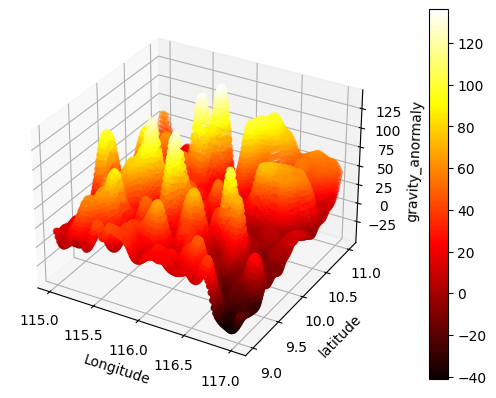

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 输入数据，包括经度、纬度和参数a
longitude = array1  # 用你的经度值替代lon1, lon2, lon3, ...
latitude = array2
a = array3

# 创建一个3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维热力图
sc = ax.scatter(longitude, latitude, a, c=a, cmap=plt.hot())
fig.colorbar(sc, ax=ax, pad=0.1)

# 设置坐标轴标签
ax.set_xlabel('Longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('gravity_anormaly')

# 显示图形
plt.savefig('3D.png')
plt.show()


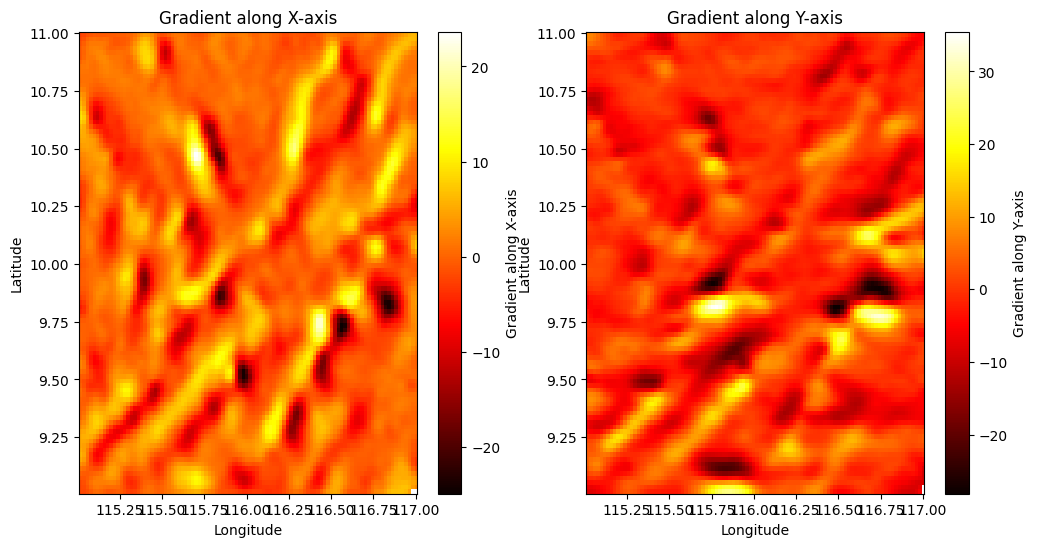

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# 假设你有经度、纬度和重力异常值的数组
longitude = np.array(df.iloc[1:, 0])
latitude = np.array(df.iloc[1:, 1])
gravity_anomaly = np.array(df.iloc[1:, 2])

# 定义网格范围
lon_min, lon_max = np.min(longitude), np.max(longitude)
lat_min, lat_max = np.min(latitude), np.max(latitude)

# 创建网格
lon_values, lat_values = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))

# 对经纬度和重力异常值进行克里金插值
points = np.column_stack((longitude, latitude))
grid_z0 = griddata(points, gravity_anomaly, (lon_values, lat_values), method='cubic')

# 计算梯度
gx, gy = np.gradient(grid_z0)

# 绘制梯度图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gx.T, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Gradient along X-axis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gradient along X-axis')

plt.subplot(1, 2, 2)
plt.imshow(gy.T, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Gradient along Y-axis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gradient along Y-axis')

# 显示图像
plt.show()


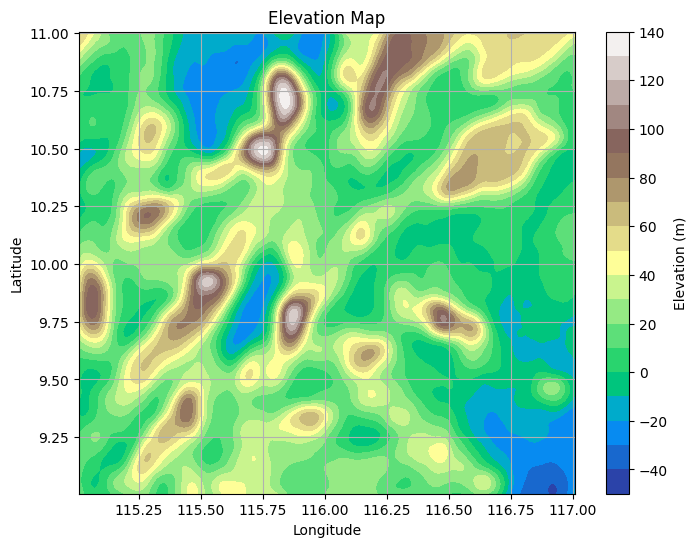

Original Elevation at (115.0083, 9.0045): 17.7
[[ 9.0045      9.0045      9.0045     ...  9.0045      9.0045
   9.0045    ]
 [ 9.00583576  9.00583576  9.00583576 ...  9.00583576  9.00583576
   9.00583576]
 [ 9.00717151  9.00717151  9.00717151 ...  9.00717151  9.00717151
   9.00717151]
 ...
 [11.00412849 11.00412849 11.00412849 ... 11.00412849 11.00412849
  11.00412849]
 [11.00546424 11.00546424 11.00546424 ... 11.00546424 11.00546424
  11.00546424]
 [11.0068     11.0068     11.0068     ... 11.0068     11.0068
  11.0068    ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 假设你有经度、纬度和高度数据
longitude = array1
latitude = array2
elevation = array3

# 确保数据列表的长度一致
if len(longitude) == len(latitude) == len(elevation):
    points = list(zip(longitude, latitude))

    # 创建网格坐标
    grid_x, grid_y = np.meshgrid(np.linspace(min(longitude), max(longitude), 1500),
                                 np.linspace(min(latitude), max(latitude), 1500))

    # 使用反距离加权插值(IDW)
    grid_z_idw = griddata(points, elevation, (grid_x, grid_y), method='cubic')

    # 创建高程图
    plt.figure(figsize=(8, 6))
    plt.contourf(grid_x, grid_y, grid_z_idw, levels=20, cmap='terrain')
    plt.colorbar(label='Elevation (m)')
    plt.title('Elevation Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.savefig('Elevation Map.png')
    plt.show()

    # 创建反映射字典，将坐标映射到高程值
    data_mapping = {(longitude[i], latitude[i]): elevation[i] for i in range(len(longitude))}

    # 示例：通过反映射查找原始高程值
    target_longitude = 115.0083
    target_latitude = 9.0045
    original_elevation = data_mapping.get((target_longitude, target_latitude))
    print(f"Original Elevation at ({target_longitude}, {target_latitude}): {original_elevation}")
else:
    print("数据列表的长度不一致。")
print(grid_y)



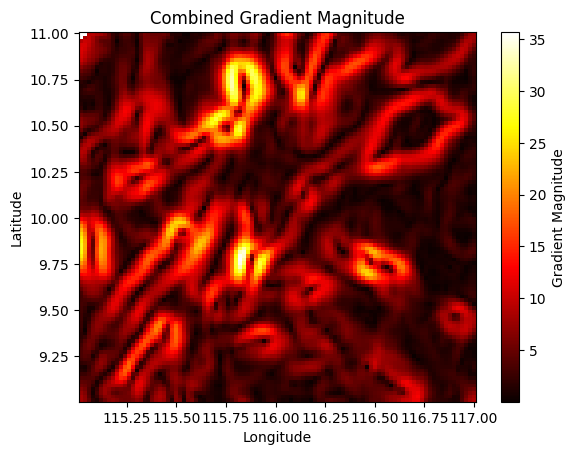

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# 假设你有经度、纬度和重力异常值的数组
longitude = np.array(df.iloc[1:, 0])
latitude = np.array(df.iloc[1:, 1])
gravity_anomaly = np.array(df.iloc[1:, 2])

# 定义网格范围
lon_min, lon_max = np.min(longitude), np.max(longitude)
lat_min, lat_max = np.min(latitude), np.max(latitude)

# 创建网格
lon_values, lat_values = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))

# 对经纬度和重力异常值进行克里金插值
points = np.column_stack((longitude, latitude))
grid_z0 = griddata(points, gravity_anomaly, (lon_values, lat_values), method='cubic')

# 计算梯度
gx, gy = np.gradient(grid_z0)

# 计算综合梯度
gradient_magnitude = np.sqrt(gx ** 2 + gy ** 2)

# 绘制综合梯度图
plt.imshow(gradient_magnitude, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Combined Gradient Magnitude')

# 显示图像
plt.savefig('Gradient Map.png')
plt.show()


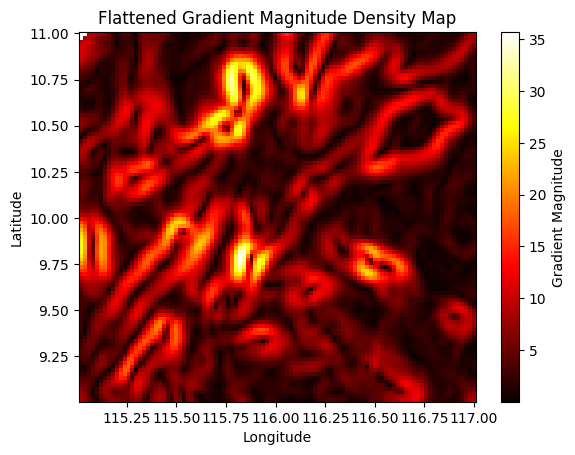

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# 假设你有经度、纬度和重力异常值的数组
longitude = np.array(df.iloc[1:, 0])
latitude = np.array(df.iloc[1:, 1])
gravity_anomaly = np.array(df.iloc[1:, 2])

# 定义网格范围
lon_min, lon_max = np.min(longitude), np.max(longitude)
lat_min, lat_max = np.min(latitude), np.max(latitude)

# 创建网格
lon_values, lat_values = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))

# 对经纬度和重力异常值进行克里金插值
points = np.column_stack((longitude, latitude))
grid_z0 = griddata(points, gravity_anomaly, (lon_values, lat_values), method='cubic')

# 计算梯度
gx, gy = np.gradient(grid_z0)

# 计算综合梯度
gradient_magnitude = np.sqrt(gx ** 2 + gy ** 2)

# 展平数组
flat_gradient_magnitude = gradient_magnitude.flatten()

# 绘制展平后的密度图
plt.hist2d(lon_values.flatten(), lat_values.flatten(), bins=100, weights=flat_gradient_magnitude, cmap='hot')
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Flattened Gradient Magnitude Density Map')

# 显示图像
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


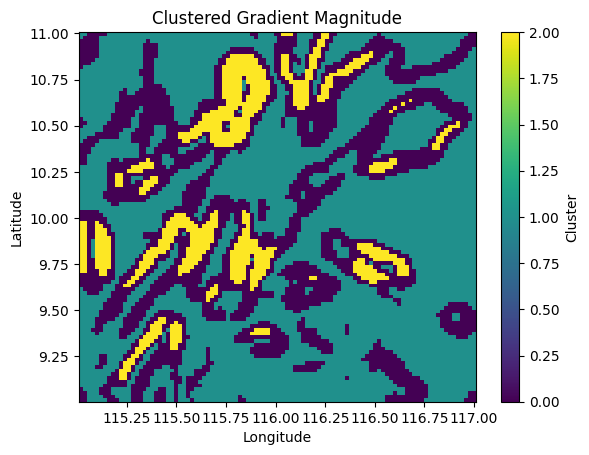

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 之前的代码

# 转换梯度矩阵以便应用K均值聚类
X = gradient_magnitude.reshape(-1, 1)

# 处理NaN值
X = np.nan_to_num(X)

# 使用K均值聚类算法
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 重新将数据转换回梯度矩阵的形状
clustered_data = y_kmeans.reshape(lon_values.shape)

# 绘制聚类结果
plt.imshow(clustered_data, extent=(lon_min, lon_max, lat_min, lat_max), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Gradient Magnitude')

# 显示图像
plt.savefig('Clustered Gradient Map.png')
plt.show()



In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# 假设你有经度、纬度和重力异常值的数组
longitude = np.array(df.iloc[1:, 0])
latitude = np.array(df.iloc[1:, 1])
gravity_anomaly = np.array(df.iloc[1:, 2])

# 定义网格范围
lon_min, lon_max = np.min(longitude), np.max(longitude)
lat_min, lat_max = np.min(latitude), np.max(latitude)

# 创建网格
lon_values, lat_values = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))

# 对经纬度和重力异常值进行克里金插值
points = np.column_stack((longitude, latitude))
grid_z0 = griddata(points, gravity_anomaly, (lon_values, lat_values), method='cubic')

# 计算梯度
gx, gy = np.gradient(grid_z0)

# 计算综合梯度
gradient_magnitude = np.sqrt(gx ** 2 + gy ** 2)

# 定义等高线级别
levels = np.arange(0, 40, 5)

# 绘制综合梯度图
plt.contourf(lon_values, lat_values, gradient_magnitude, levels=levels, cmap='hot')
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Combined Gradient Magnitude')

# 显示图像
plt.show()

# 给定特征序号，返回其横纵坐标
# 给定特征序号，返回其横纵坐标
# 给定特征序号，返回其横纵坐标
# 给定特征序号，返回其横纵坐标
# 给定特征序号，返回其横纵坐标
def get_coordinates_from_feature_index(feature_index):
    if feature_index in range(7):
        threshold_value = feature_index * 5
        if feature_index == 6:
            indices = np.where((gradient_magnitude >= threshold_value) & (gradient_magnitude <= threshold_value + 5))
        else:
            indices = np.where((gradient_magnitude >= threshold_value) & (gradient_magnitude < threshold_value + 5))
        lon_indices = indices[0]
        lat_indices = indices[1]
        coordinates = [(lon_values[i, j], lat_values[i, j]) for i, j in zip(lon_indices, lat_indices)]
        return coordinates
    else:
        return "特征序号超出范围."


get_coordinates_from_feature_index(1)



NameError: ignored

In [ ]:
def find_nearest_value(feature_index, df):
    threshold_value = feature_index * 5
    if feature_index == 6:
        indices = np.where((gradient_magnitude >= threshold_value) & (gradient_magnitude <= threshold_value + 5))
    else:
        indices = np.where((gradient_magnitude >= threshold_value) & (gradient_magnitude < threshold_value + 5))
    lon_indices = indices[0]
    lat_indices = indices[1]
    lon_coordinates = [lon_values[i, j] for i, j in zip(lon_indices, lat_indices)]
    lat_coordinates = [lat_values[i, j] for i, j in zip(lon_indices, lat_indices)]
    for i in range(len(df)):
        if df.iloc[i, 0] in lon_coordinates and df.iloc[i, 1] in lat_coordinates:
            df.loc[i, 'Feature_Index'] = feature_index  # 将特征序号写入新的列
    return df

# 将数据写回Excel文件
df = pd.DataFrame({'Longitude': longitude, 'Latitude': latitude, 'Gravity': gravity_anomaly})
for i in range(7):  # 假设共有7个特征序号
    df = find_nearest_value(i, df)  # 依次计算每个特征序号
df.to_excel('A.xlsx', index=False)  # 将数据写回Excel文件

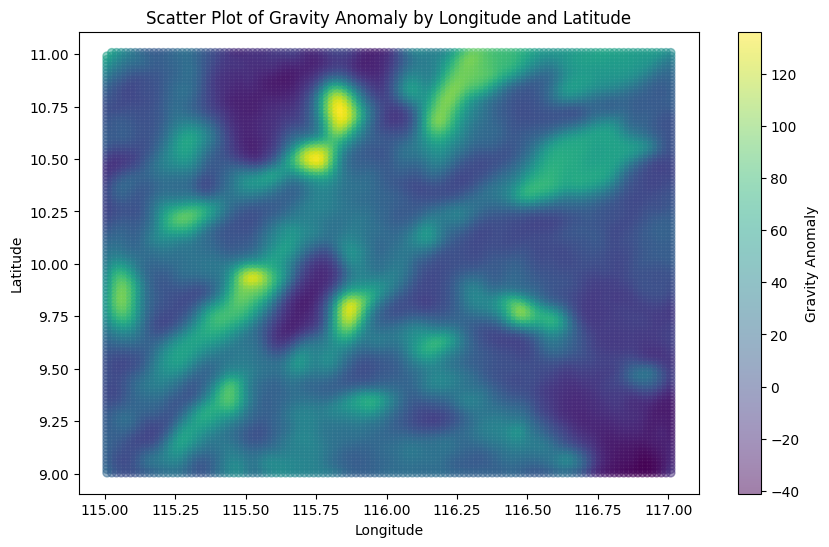

In [ ]:
import matplotlib.pyplot as plt

# 假设您已经定义了经度、纬度和重力异常值的NumPy数组
longitude = np.array(df.iloc[1:,0])
latitude = np.array(df.iloc[1:,1])
gravity_anomaly = np.array(df.iloc[1:,2])

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=gravity_anomaly, cmap='viridis', alpha=0.5)
plt.colorbar(label='Gravity Anomaly')
plt.title('Scatter Plot of Gravity Anomaly by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



In [ ]:
import numpy as np

# 假设你有一个热力图数据 grid_z0，这里用随机数据代替
grid_z0 = np.random.rand(100, 100)

# 计算梯度或者变化率
gradient_x, gradient_y = np.gradient(grid_z0)

# 计算梯度的绝对值
gradient_abs = np.sqrt(gradient_x**2 + gradient_y**2)

# 定义阈值，根据梯度绝对值筛选区域
threshold = 0.1

# 找到梯度绝对值大于阈值的区域
indices = np.where(gradient_abs > threshold)
max_change_areas = list(zip(indices[0], indices[1]))

# 假设经度和纬度的范围
lon_min, lon_max = longitude_min, longitude_max  # 替换为实际的经度范围
lat_min, lat_max = latitude_min, latitude_max  # 替换为实际的纬度范围

# 计算分辨率
resolution = (lon_max - lon_min) / 100, (lat_max - lat_min) / 100  # 假设网格分辨率为 100

# 将区域转换为经纬度
for area in max_change_areas:
    lon = lon_min + area[1] * resolution[0]
    lat = lat_min + area[0] * resolution[1]




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1239: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1239: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1240: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/fun

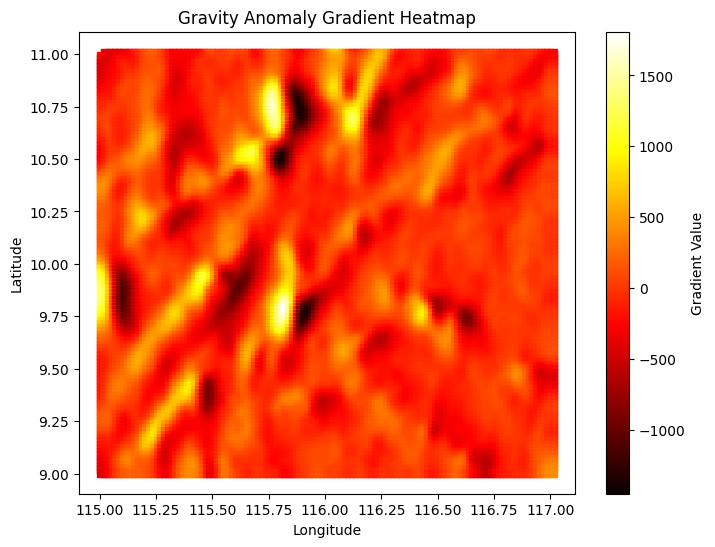

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# 计算经度和纬度的梯度
grad_longitude = np.gradient(gravity_anomaly, longitude)
grad_latitude = np.gradient(gravity_anomaly, latitude)

# 生成梯度热力图
# 生成梯度热力图
plt.figure(figsize=(8, 6))
plt.title('Gravity Anomaly Gradient Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(longitude, latitude, c=grad_longitude, cmap='hot', marker='s')
plt.colorbar(label='Gradient Value')
plt.show()


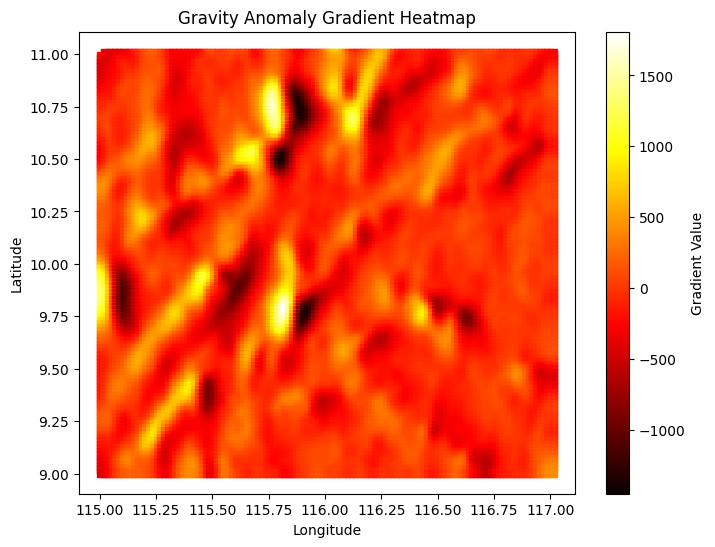

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gravityanomaly = np.array(df.iloc[1:,2])
longitude1 = np.array(df.iloc[1:,0])
latitude1 = np.array(df.iloc[1:,1])
gradlongitude = np.gradient(gravityanomaly, longitude1)
plt.figure(figsize=(8, 6))
plt.title('Gravity Anomaly Gradient Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(longitude1, latitude1, c=gradlongitude, cmap='hot', marker='s')
plt.colorbar(label='Gradient Value')
plt.show()


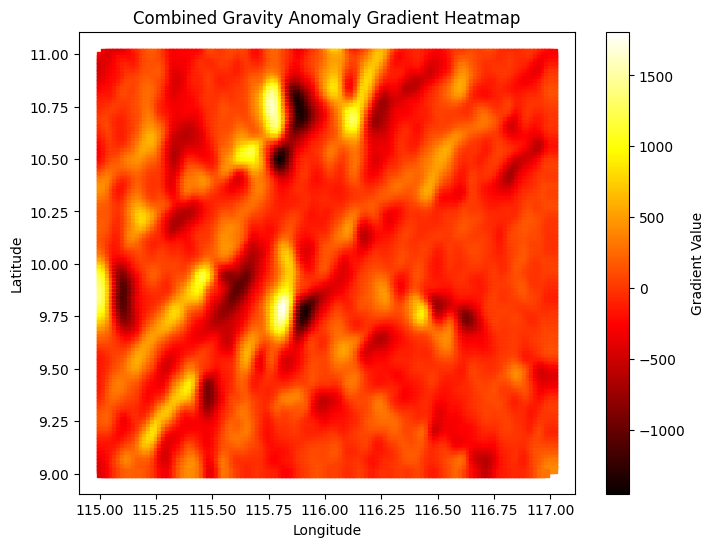

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 假设您的数据集中每120行是一类，一共有124类
num_classes = 124
data_list = []

# 逐类处理数据并添加到data_list中
for i in range(num_classes):
    start_idx = i * 120 + 1
    end_idx = (i + 1) * 120 + 1
    gravity_anomaly = np.array(df.iloc[start_idx:end_idx, 2])
    longitude = np.array(df.iloc[start_idx:end_idx, 0])
    latitude = np.array(df.iloc[start_idx:end_idx, 1])
    data_list.append((gravity_anomaly, longitude, latitude))

# 合并所有类别的数据
combined_gravity_anomaly = np.concatenate([data[0] for data in data_list])
combined_longitude = np.concatenate([data[1] for data in data_list])
combined_latitude = np.concatenate([data[2] for data in data_list])

# 计算合并后数据集的梯度
combined_grad_longitude = np.gradient(combined_gravity_anomaly, combined_longitude)

# 生成整体梯度热力图
plt.figure(figsize=(8, 6))
plt.title('Combined Gravity Anomaly Gradient Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(combined_longitude, combined_latitude, c=combined_grad_longitude, cmap='hot', marker='s')
plt.colorbar(label='Gradient Value')
plt.show()


In [ ]:
# 假设你的数据存储在一个名为data的列表中
 # 在这里替换为你的数据

# 初始化一个空集合来存储唯一的数据组合
unique_sets = set()

# 遍历整个数据
for i in range(0, len(array2), 120):
    current_set = tuple(array2[i:i+120])  # 获取当前120行的数据作为一个元组
    unique_sets.add(current_set)  # 将当前的数据组合添加到集合中
m = len(unique_sets) -1
# 打印一共有多少类
print(f"一共有 {m} 类数据组合。")


一共有 124 类数据组合。


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


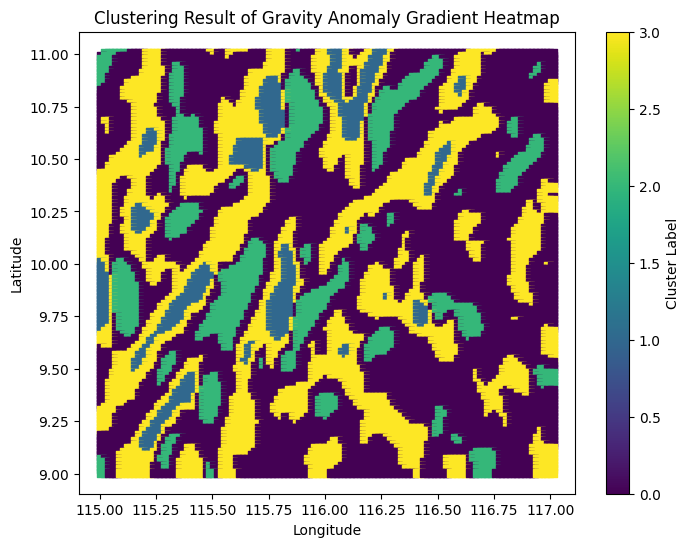

In [ ]:
from sklearn.cluster import KMeans

# 将梯度数据转换为二维数组
X = np.column_stack((longitude, latitude, grad_longitude))

# 设置聚类数
n_clusters = 4

# 使用K均值聚类算法
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

# 获取聚类结果
labels = kmeans.labels_

# 绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(longitude, latitude, c=labels, cmap='viridis', marker='s')
plt.title('Clustering Result of Gravity Anomaly Gradient Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
# 假设labels是您的聚类结果标签，cluster_id是您想要返回的某一类的ID
cluster_id = 3  # 假设您想返回第一类的经纬度，可以根据实际情况调整

# 根据聚类结果标签获取某一类的索引
indices = np.where(labels == cluster_id)[0]

# 返回对应类别的经度和纬度
cluster_longitude = longitude[indices]
cluster_latitude = latitude[indices]

# 打印结果
print(f"Longitude of Cluster {cluster_id}:", cluster_longitude)
print(f"Latitude of Cluster {cluster_id}:", cluster_latitude)



Longitude of Cluster 3: [115.225  115.2417 115.2583 ... 116.975  116.9917 117.0083]
Latitude of Cluster 3: [11.0068 11.0068 11.0068 ...  9.0045  9.0045  9.0045]


In [ ]:
grid_z_idw[np.isnan(grid_z_idw)] = 0

# 创建一个 Pandas DataFrame
data = pd.DataFrame({'Longitude': grid_x.ravel(), 'Latitude': grid_y.ravel(), 'Elevation': grid_z_idw.ravel()})

# 保存为 CSV 文件
data.to_csv('elevation_data.csv', index=False)

Minimum Value: -9223372036854775808
Maximum Value: -9223372036854775808
Mean Value: -9.223372036854776e+18


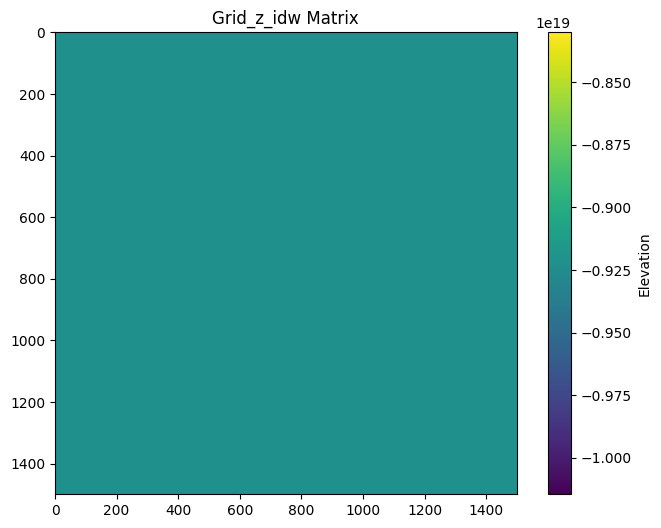

In [ ]:
min_value = np.min(grid_z_idw)
max_value = np.max(grid_z_idw)
mean_value = np.mean(grid_z_idw)

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Mean Value: {mean_value}")

# 可视化矩阵内容
plt.figure(figsize=(8, 6))
plt.imshow(grid_z_idw, cmap='viridis', interpolation='none')
plt.colorbar(label='Elevation')
plt.title('Grid_z_idw Matrix')
plt.show()

In [ ]:
# 假设你有一组数据
data = grid_z_idw

# 计算Robust正则化后的数据
median = np.median(data)
quartile_1 = np.percentile(data, 25)
quartile_3 = np.percentile(data, 75)
iqr = quartile_3 - quartile_1

# 使用Robust正则化将数据映射到[0, 1]范围
robust_normalized = (data - median) / iqr

# 将数据映射到[0, 255]范围
min_value = 0
max_value = 255
robust_normalized = (robust_normalized - np.min(robust_normalized)) / (np.max(robust_normalized) - np.min(robust_normalized)) * (max_value - min_value) + min_value
data = robust_normalized.astype(int)
grid_z_idw = data
min_value = np.min(grid_z_idw)
max_value = np.max(grid_z_idw)
mean_value = np.mean(grid_z_idw)

print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")
print(f"Mean Value: {mean_value}")

# 可视化矩阵内容
plt.figure(figsize=(8, 6))
plt.imshow(grid_z_idw, cmap='viridis', interpolation='none')
plt.colorbar(label='Elevation')
plt.title('Grid_z_idw Matrix')
plt.show()

In [ ]:
data = load('data.txt')

NameError: ignored